In [ ]:
from scipy.stats import norm
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
%matplotlib inline

sns.set(context='talk', palette='hls')

In [ ]:
#connect to google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv('../content/drive/My Drive/data set/pokemon.csv')

In [ ]:
df.describe()

,#,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation
count,800.000000,800.00000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.00000
mean,362.813750,435.10250,69.258750,79.001250,73.842500,72.820000,71.902500,68.277500,3.32375
std,208.343798,119.96304,25.534669,32.457366,31.183501,32.722294,27.828916,29.060474,1.66129
min,1.000000,180.00000,1.000000,5.000000,5.000000,10.000000,20.000000,5.000000,1.00000
25%,184.750000,330.00000,50.000000,55.000000,50.000000,49.750000,50.000000,45.000000,2.00000
50%,364.500000,450.00000,65.000000,75.000000,70.000000,65.000000,70.000000,65.000000,3.00000
75%,539.250000,515.00000,80.000000,100.000000,90.000000,95.000000,90.000000,90.000000,5.00000
max,721.000000,780.00000,255.000000,190.000000,230.000000,194.000000,230.000000,180.000000,6.00000


In [ ]:
df[df['Name'].apply(lambda x: 'Mega ' in x)].head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
7,6,CharizardMega Charizard X,Fire,Dragon,634,78,130,111,130,85,100,1,False
8,6,CharizardMega Charizard Y,Fire,Flying,634,78,104,78,159,115,100,1,False
12,9,BlastoiseMega Blastoise,Water,NaN,630,79,103,120,135,115,78,1,False
19,15,BeedrillMega Beedrill,Bug,Poison,495,65,150,40,15,80,145,1,False


In [ ]:
# Alternatif
df[df['Name'].str.contains('Mega')].head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
7,6,CharizardMega Charizard X,Fire,Dragon,634,78,130,111,130,85,100,1,False
8,6,CharizardMega Charizard Y,Fire,Flying,634,78,104,78,159,115,100,1,False
12,9,BlastoiseMega Blastoise,Water,NaN,630,79,103,120,135,115,78,1,False
19,15,BeedrillMega Beedrill,Bug,Poison,495,65,150,40,15,80,145,1,False


In [ ]:
# Membuang Pokemon mega evolution
df = df[~df['Name'].str.contains('Mega')]
df.shape

(751, 13)

In [ ]:
df[730:]

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
778,708,Phantump,Ghost,Grass,309,43,70,48,50,60,38,6,False
779,709,Trevenant,Ghost,Grass,474,85,110,76,65,82,56,6,False
780,710,PumpkabooAverage Size,Ghost,Grass,335,49,66,70,44,55,51,6,False
781,710,PumpkabooSmall Size,Ghost,Grass,335,44,66,70,44,55,56,6,False
782,710,PumpkabooLarge Size,Ghost,Grass,335,54,66,70,44,55,46,6,False
783,710,PumpkabooSuper Size,Ghost,Grass,335,59,66,70,44,55,41,6,False
784,711,GourgeistAverage Size,Ghost,Grass,494,65,90,122,58,75,84,6,False
785,711,GourgeistSmall Size,Ghost,Grass,494,55,85,122,58,75,99,6,False
786,711,GourgeistLarge Size,Ghost,Grass,494,75,95,122,58,75,69,6,False
787,711,GourgeistSuper Size,Ghost,Grass,494,85,100,122,58,75,54,6,False


In [ ]:
poke3 = df[df['Generation'].isin([1,2,3])] # Mengambil Pokemon dari tiga generasi pertama
poke3 = poke3.drop([422,424,429,430,431]) # Membuang beberapa Pokemon dalam bentuk lain
poke3.shape

(385, 13)

In [ ]:
poke3[poke3['Total'] == poke3['Total'].max()]

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
162,150,Mewtwo,Psychic,NaN,680,106,110,90,154,90,130,1,True
269,249,Lugia,Psychic,Flying,680,106,90,130,90,154,110,2,True
270,250,Ho-oh,Fire,Flying,680,106,130,90,110,154,90,2,True
425,384,Rayquaza,Dragon,Flying,680,105,150,90,150,90,95,3,True


In [ ]:
poke3[poke3['Total'] == poke3['Total'].min()]

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
206,191,Sunkern,Grass,NaN,180,30,30,30,30,30,30,2,False


In [ ]:
len(poke3[poke3['Legendary']])

19

In [ ]:
poke3[poke3['Legendary']]['Type 1'].value_counts()

Fire        3
Psychic     3
Dragon      3
Ice         2
Steel       2
Water       2
Electric    2
Ground      1
Rock        1
Name: Type 1, dtype: int64

In [ ]:
poke3.groupby('Legendary')['HP'].agg(['mean','median','std'])

,mean,median,std
Legendary,,,
False,64.86612,60,28.106863
True,92.00000,90,14.985178


In [ ]:
poke3[((poke3['Sp. Atk'] > 140) & (poke3['Type 1'] == 'Water')) | ((poke3['Sp. Def'] > 140) & (poke3['Type 1'] == 'Fire'))]

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
270,250,Ho-oh,Fire,Flying,680,106,130,90,110,154,90,2,True
421,382,Kyogre,Water,NaN,670,100,100,90,150,140,90,3,True


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


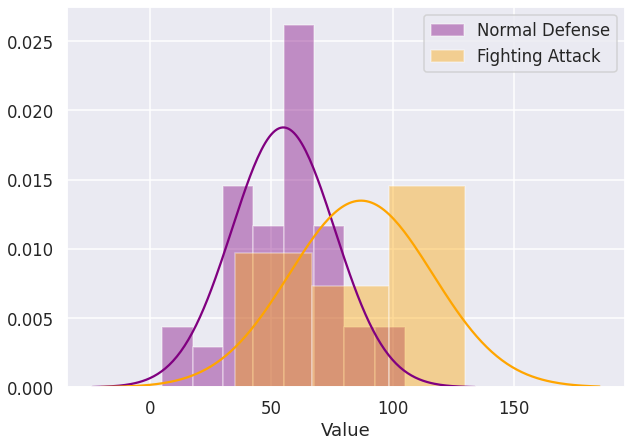

In [ ]:
sns.distplot(poke3[poke3['Type 1'] == 'Normal']['Defense'], kde=False, fit=norm, fit_kws={'color': 'purple'}, label='Normal Defense', color='purple')
sns.distplot(poke3[poke3['Type 1'] == 'Fighting']['Attack'], kde=False, fit=norm, fit_kws={'color': 'orange'}, label='Fighting Attack', color='orange')
plt.xlabel('Value')
plt.legend()
plt.show()

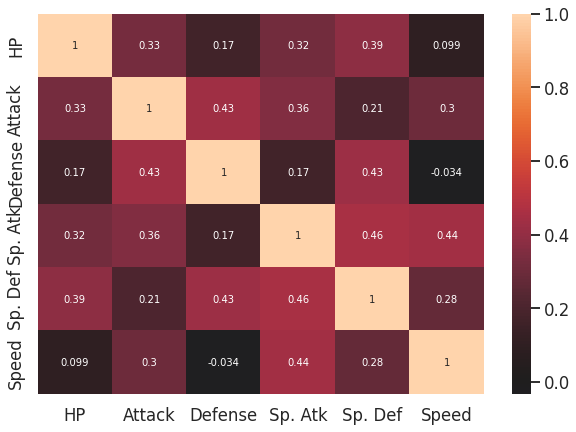

In [ ]:
sns.heatmap(
    poke3[['HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed']].corr(),
    annot=True,
    center=0,
);